#  IBM model 1

A Python implementation of IBM model 1. See [Statistical Machine Translation] by Philipp Koehn for details.

Note: My output diverges from the example in the book starting with the 2nd iteration.

In [1]:
import math
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Input: english sentence e, foreign sentence f, hash of translation probabilities t, epsilon 
# Output: probability of e given f

def probability_e_f(e, f, t, epsilon=1):
    l_e = len(e)
    l_f = len(f)
    p_e_f = 1
    
    for ew in e: # iterate over english words ew in english sentence e
        inner_sum = 0
        for fw in f: # iterate over foreign words fw in foreign sentence f
            inner_sum += t[(ew, fw)]
        p_e_f = inner_sum * p_e_f
    
    p_e_f = p_e_f * epsilon / (l_f**l_e)
    
    return p_e_f            

In [3]:
# Input: Collection of sentence pairs sentence_pairs, hash of translation probabilities t, epsilon
# Output: Perplexity of model

def perplexity(sentence_pairs, t, epsilon=1, debug_output=False):
    pp = 0
    
    for sp in sentence_pairs:
        prob = probability_e_f(sp[1], sp[0], t)
        if debug_output:
            print('english sentence:', sp[1], 'foreign sentence:', sp[0])
            print(prob)
            print()
        pp += math.log(prob, 2) # log base 2
        
    pp = 2.0**(-pp)
    return pp

In [5]:
# Get sentence pairs for toy experiment
sentence_pairs = [ 
    [ ['das', 'Haus'], ['the', 'house'] ], 
    [ ['das', 'Buch'], ['the', 'book'] ], 
    [ ['ein', 'Buch'], ['a', 'book'] ]
]




print('No. of sentences in translation memory: ', len(sentence_pairs))
print('Content: ', sentence_pairs)

No. of sentences in translation memory:  3
Content:  [[['das', 'Haus'], ['the', 'house']], [['das', 'Buch'], ['the', 'book']], [['ein', 'Buch'], ['a', 'book']]]


In [6]:
# Extract foreign and english vocabularies
foreign_words = []
english_words = []

for sp in sentence_pairs:
    for ew in sp[1]: 
        english_words.append(ew)
    for fw in sp[0]: 
        foreign_words.append(fw)
        
english_words = sorted(list(set(english_words)), key=lambda s: s.lower()) 
foreign_words = sorted(list(set(foreign_words)), key=lambda s: s.lower())
print('English vocab: ', english_words)
print('Foreign vocab: ', foreign_words)

english_vocab_size = len(english_words)
foreign_vocab_size = len(foreign_words)
print('english_vocab_size: ', english_vocab_size)
print('foreign_vocab_size: ', foreign_vocab_size)

English vocab:  ['a', 'book', 'house', 'the']
Foreign vocab:  ['Buch', 'das', 'ein', 'Haus']
english_vocab_size:  4
foreign_vocab_size:  4


In [7]:
# Routine to uniformly initialize word translation probabilities in t hash

def init_prob(t, init_val, english_words, foreign_words):
    for fw in foreign_words:
        for ew in english_words:
            tup = (ew, fw) # tuple required because dict key cannot be list
            t[tup] = init_val

In [8]:
# Main routine
num_iterations = 5
perplex = []
debug_output = True
s_total = {}

# Initialize probabilities uniformly
t = {}
init_val = 1.0 / foreign_vocab_size
init_prob(t, init_val, english_words, foreign_words)
if debug_output:
    print('Hash initialized')
    print('No. of foreign/english pairs: ', len(t))
    print('Content: ', t)
    print('**************')
    print()

# Loop while not converged
for iter in range(num_iterations):
    
    # Calculate perplexity
    pp = perplexity(sentence_pairs, t, 1, True)
    print(pp)
    print('**************')
    perplex.append(pp)

    # Initialize
    count = {}
    total = {}

    for fw in foreign_words:
        total[fw] = 0.0
        for ew in english_words:
            count[(ew, fw)] = 0.0

    for sp in sentence_pairs:

        # Compute normalization
        for ew in sp[1]:
            s_total[ew] = 0.0
            for fw in sp[0]:
                s_total[ew] += t[(ew, fw)]

        # Collect counts
        for ew in sp[1]:
            for fw in sp[0]:
                count[(ew, fw)] += t[(ew, fw)] / s_total[ew]
                total[fw] += t[(ew, fw)] / s_total[ew]

    # Estimate probabilities
    for fw in foreign_words:
        for ew in english_words:
            t[(ew, fw)] = count[(ew, fw)] / total[fw]

    if debug_output:
        print("--> *** t[('the','das')]", t[('the','das')])
        print("--> *** t[('book','das')]", t[('book','das')])
    
        print("--> t[('house','das')]", t[('house','das')])
        print("--> *** t[('the','Buch')]", t[('the','Buch')])
        print("--> *** t[('book','Buch')]", t[('book','Buch')])
        print("--> t[('a','Buch')]", t[('a','Buch')])
        print("--> t[('book','ein')]", t[('book','ein')])
        print("--> t[('a','ein')]", t[('a','ein')])

        print("--> t[('the','Haus')]", t[('the','Haus')])
        print("--> t[('house','Haus')]", t[('house','Haus')])

Hash initialized
No. of foreign/english pairs:  16
Content:  {('a', 'Buch'): 0.25, ('book', 'Buch'): 0.25, ('house', 'Buch'): 0.25, ('the', 'Buch'): 0.25, ('a', 'das'): 0.25, ('book', 'das'): 0.25, ('house', 'das'): 0.25, ('the', 'das'): 0.25, ('a', 'ein'): 0.25, ('book', 'ein'): 0.25, ('house', 'ein'): 0.25, ('the', 'ein'): 0.25, ('a', 'Haus'): 0.25, ('book', 'Haus'): 0.25, ('house', 'Haus'): 0.25, ('the', 'Haus'): 0.25}
**************

english sentence: ['the', 'house'] foreign sentence: ['das', 'Haus']
0.0625

english sentence: ['the', 'book'] foreign sentence: ['das', 'Buch']
0.0625

english sentence: ['a', 'book'] foreign sentence: ['ein', 'Buch']
0.0625

4096.0
**************
--> *** t[('the','das')] 0.5
--> *** t[('book','das')] 0.25
--> t[('house','das')] 0.25
--> *** t[('the','Buch')] 0.25
--> *** t[('book','Buch')] 0.5
--> t[('a','Buch')] 0.25
--> t[('book','ein')] 0.5
--> t[('a','ein')] 0.5
--> t[('the','Haus')] 0.5
--> t[('house','Haus')] 0.5
english sentence: ['the', 'hous

# Plot of perplexity

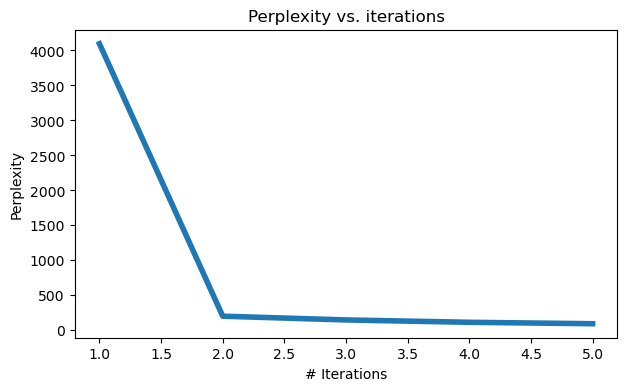

In [9]:

plt.figure(figsize=(7,4))
plt.plot(range(1, num_iterations+1), perplex, linewidth=4)
plt.xlabel('# Iterations')
plt.ylabel('Perplexity')
plt.title('Perplexity vs. iterations')
plt.rcParams.update({'font.size': 12})

## Plot of log base 10 of perplexity

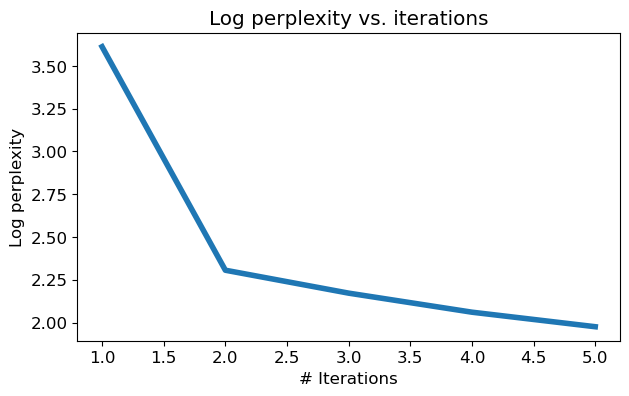

In [10]:

plt.figure(figsize=(7,4))
plt.plot(range(1, num_iterations+1), numpy.log10(perplex), linewidth=4)
plt.xlabel('# Iterations')
plt.ylabel('Log perplexity')
plt.title('Log perplexity vs. iterations')
plt.rcParams.update({'font.size': 12})